In [3]:
!pip install --upgrade tensorflow




Found 6000 images belonging to 30 classes.
Found 600 images belonging to 30 classes.
Found 960 images belonging to 30 classes.
{'almond': 0, 'apple': 1, 'banana': 2, 'beetroot': 3, 'burger': 4, 'cashew': 5, 'cauliflower': 6, 'chai': 7, 'chapati': 8, 'cholebhature': 9, 'corn': 10, 'dalmakhani': 11, 'dates': 12, 'fig': 13, 'icecream': 14, 'jalebi': 15, 'noodles': 16, 'orange': 17, 'pavbhaji': 18, 'pineapple': 19, 'pomergranate': 20, 'potato': 21, 'raisin': 22, 'raspberry': 23, 'rice': 24, 'soup': 25, 'strawberry': 26, 'tomato': 27, 'walnut': 28, 'watermelon': 29}
Training samples: 6000
Validation samples: 600
Epoch 1/5
187/187 [==============================] - 727s 4s/step - loss: 0.5165 - accuracy: 0.8524 - val_loss: 0.1998 - val_accuracy: 0.9358
Epoch 2/5
187/187 [==============================] - 639s 3s/step - loss: 0.2032 - accuracy: 0.9365 - val_loss: 0.1775 - val_accuracy: 0.9514
Epoch 3/5
187/187 [==============================] - 646s 3s/step - loss: 0.1911 - accuracy: 0.9405 -

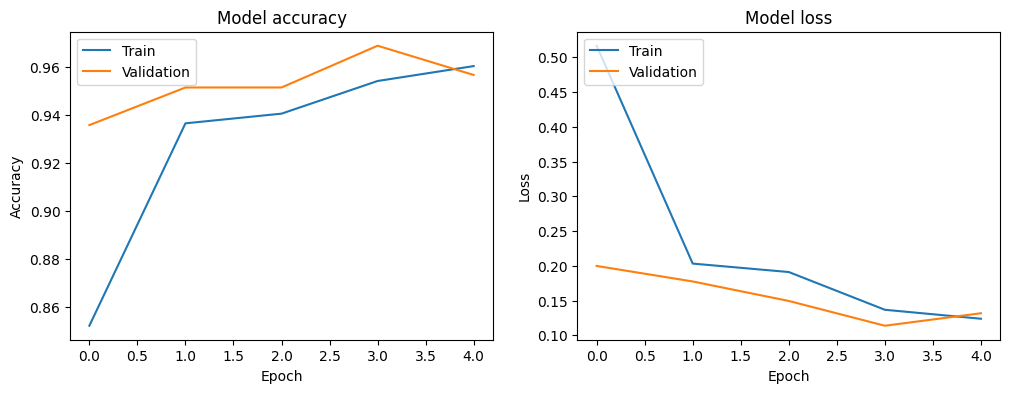

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import Image

# Define paths
train_dir = 'C:/Users/Kartik/Desktop/DATASETN/train'
validation_dir = 'C:/Users/Kartik/Desktop/DATASETN/val'
test_dir = 'C:/Users/Kartik/Desktop/DATASETN/test'

# Image data generators with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)

# Print the class indices to verify
print(train_generator.class_indices)

# Save the class indices for later use
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

# Build the model with InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(class_indices), activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print some information from the generators to ensure they are working correctly
print(f'Training samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // 32)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Save the model
model.save('./FV8.hdf5')

# Function to preprocess and predict the class of an image
def predict_image(image_path, model, class_names):
    image = Image.open(image_path)
    image = image.resize((299, 299))
    img_array = np.array(image) / 255.0  # Ensure the image is normalized
    img_4d = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_4d)[0]
    max_prob_index = prediction.argmax()

    predicted_class = class_names[max_prob_index]
    return predicted_class

# Load the saved model
model = tf.keras.models.load_model('FV8.hdf5')




In [11]:
# Test the prediction function
test_image_path = 'C:/Users/Kartik/Downloads/water2.jpg'
predicted_class = predict_image(test_image_path, model, class_names)
print(f'The image belongs to class: {predicted_class}')


1/1 [==============================] - 0s 173ms/step
The image belongs to class: beetroot


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 118s 1us/step


Epoch 1/5


C:\Users\Kartik\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 848s 4s/step - accuracy: 0.6643 - loss: 1.2650 - val_accuracy: 0.9003 - val_loss: 0.2862
Epoch 2/5
  1/212 ━━━━━━━━━━━━━━━━━━━━ 10:15 3s/step - accuracy: 0.8750 - loss: 0.3884

C:\Users\Kartik\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8750 - loss: 0.3884 - val_accuracy: 1.0000 - val_loss: 0.1616
Epoch 3/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 800s 4s/step - accuracy: 0.9067 - loss: 0.2903 - val_accuracy: 0.9301 - val_loss: 0.2341
Epoch 4/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9375 - loss: 0.1928 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 5/5
212/212 ━━━━━━━━━━━━━━━━━━━━ 816s 4s/step - accuracy: 0.9156 - loss: 0.2679 - val_accuracy: 0.9375 - val_loss: 0.2097


34/34 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.9333 - loss: 0.2086
Test accuracy: 0.9384191036224365


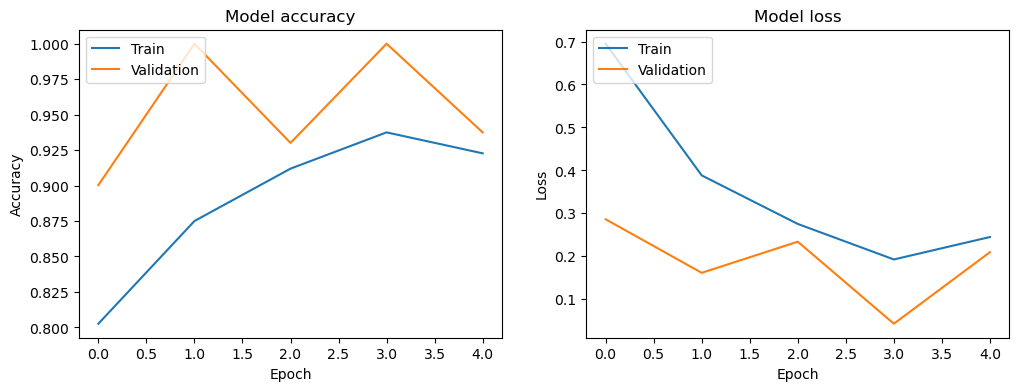

In [11]:
model.save('./FV2.hdf5')

In [21]:
import cv2
import pickle
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, ImageTk

print(tf.__version__)

# Ensure the TensorFlow version matches the version used to save the model
# Load the pre-trained model
model = tf.keras.models.load_model('FV2.hdf5')

# List of class names (update this list according to your dataset)
class_names = ['cashew', 'apple', 'banana', 'beetroot', 'burger', 'masaladosa', 'cauliflower', 'chai',
 'chapati', 'cholebhature', 'corn', 'dalmakhani', 'dates', 'fig' ,'icecream'
 ,'idli', 'jalebi', 'kadaipaneer', 'almond', 'meat', 'noodles' ,'orange',
 'pavbhaji', 'pineapple', 'jalebi', 'pomergranate', 'potato', 'raisin',
 'raspberry', 'rice', 'soup', 'strawberry', 'tomato', 'walnut']  # Example list

# Load a new image for prediction
new_image_path = 'C:/Users/Kartik/Desktop/newdataset/train_images/train_images/banana/81_100.jpg'
image = Image.open(new_image_path)

# Preprocess the image
img_array = np.array(image.resize((299, 299)))
img_4d = img_array.reshape(-1, 299, 299, 3)

# Predict the class of the image
prediction = model.predict(img_4d)[0]
max_prob_index = prediction.argmax()

# Get the class name
predicted_class = class_names[max_prob_index]

print(f'The image belongs to class: {predicted_class}')


2.16.1


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
The image belongs to class: almond
